In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import sklearn as skl

# Analysis

## 2008-2012

In [2]:
data_2008 = pd.read_csv('Preprocessed_Data/2008-2012.csv')
data_2008

,body,match,author,score,subreddit,time,month,year
0,Well the noodles contain MSG. I would use the ...,MSG,Jkins20,-5,Cooking,2012-05-10 02:29:15 UTC,5,2012
1,I'm convinced Knorr is secretly holding Marco'...,MSG,EndlessAutumn,5,Cooking,2012-10-19 15:36:52 UTC,10,2012
2,MSG,MSG,ameoba,1,Cooking,2012-01-20 06:38:59 UTC,1,2012
3,I worked in a Chinese restaurant one summer &a...,MSG,ameoba,1,Cooking,2012-06-12 02:36:10 UTC,6,2012
4,"I'm not sensitive to MSG, but I still try to a...",MSG,meohmy13,2,Cooking,2012-02-16 21:06:44 UTC,2,2012
...,...,...,...,...,...,...,...,...
708,As do so many negative/positive things have a ...,MSG,jeffois,1,Cooking,2012-05-27 20:32:11 UTC,5,2012
709,Velveeta? Hell to the no.\n\nHormel Beanless C...,Monosodium Glutamate,tinyberlin,5,recipes,2012-09-22 10:49:18 UTC,9,2012
710,"I agree - stick with a soup, preferably one wi...",monosodium glutamate,JansSushiBar,1,Cooking,2012-04-16 14:07:14 UTC,4,2012
711,"This is not as pretty as stock, but it's very ...",msg,xnihil0zer0,1,Cooking,2012-09-26 06:11:45 UTC,9,2012


Inspecting the names used for MSG:

Text(0.5, 1.0, 'Frequency of MSG terms in 2018-2012.')

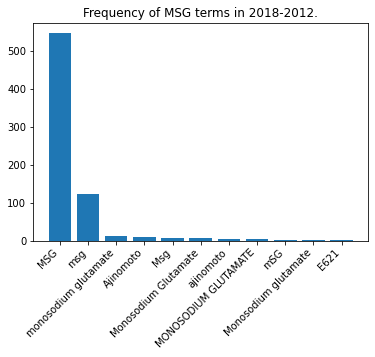

In [3]:
name_freq = data_2008['match'].value_counts()
name_freq
plt.bar(name_freq.index,name_freq)
plt.xticks(rotation=45, ha="right")
plt.title('Frequency of MSG terms in 2018-2012.')

Inspecting the most frequent authors:

In [4]:
name_freq = data_2008['author'].value_counts()
name_freq

BattleHall          9
ReallyEvilCanine    8
Bran_Solo           8
smacksaw            7
dtwhitecp           7
                   ..
duovigintillion     1
RoseHelene          1
Tomuchan            1
MrJMaxted0291       1
foxpawz             1
Name: author, Length: 486, dtype: int64

Inspecting the comment score distribution:

Text(0.5, 1.0, 'Histogram of scores of comments mentioning MSG in 2008-2012.')

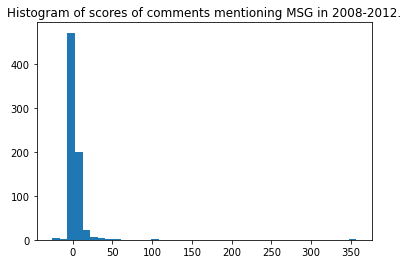

In [5]:
plt.hist(data_2008['score'],bins=40)
plt.title('Histogram of scores of comments mentioning MSG in 2008-2012.')

Inspecting the subreddit frequencies:

Text(0.5, 1.0, 'Frequency of comments mentioning MSG per subreddits in 2008-2012.')

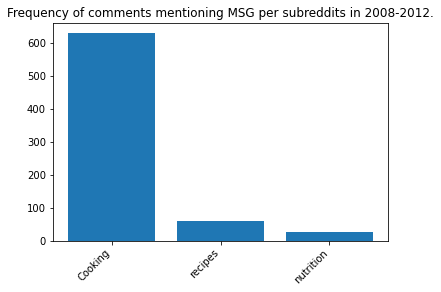

In [6]:
subreddit_freq = data_2008['subreddit'].value_counts()
subreddit_freq
plt.bar(subreddit_freq.index,subreddit_freq)
plt.xticks(rotation=45, ha="right")
plt.title('Frequency of comments mentioning MSG per subreddits in 2008-2012.')

Inspecting the frequency per month:

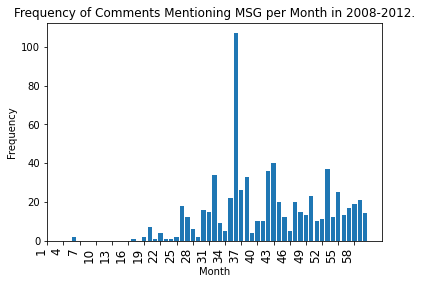

In [21]:
data_2008_monthly = (data_2008['year']-2008)*12 + data_2008['month']
month_freq = data_2008_monthly.value_counts()
month_freq
plt.bar(month_freq.index,month_freq)
plt.xticks(range(month_freq.index.sort_values()[-1])[1::3],rotation=90, ha="right",size=12)
plt.title('Frequency of Comments Mentioning MSG per Month in 2008-2012.')
plt.xlabel("Month")
plt.ylabel("Frequency")
ax = plt.gca()
plt.show()

In [8]:
data_2008[data_2008_monthly==36]

,body,match,author,score,subreddit,time,month,year
22,Have you contacted Thrifty Foods? They probabl...,MSG,tsdguy,5,Cooking,2010-12-15 23:43:38 UTC,12,2010
24,There isn't any real evidence that MSG is bad ...,MSG,xen0cide,1,Cooking,2010-12-04 12:26:12 UTC,12,2010
25,I am a MSG fan too. Almost all savory dishes b...,MSG,VicinSea,1,Cooking,2010-12-15 16:49:48 UTC,12,2010
27,"People do have the right to refuse to eat it, ...",MSG,needsmorecoffee,1,Cooking,2010-12-15 16:00:31 UTC,12,2010
28,I've tasted the yeast stuff in the factory pur...,MSG,bananasinpyamas,1,Cooking,2010-12-18 18:42:16 UTC,12,2010
...,...,...,...,...,...,...,...,...
279,Someone else I was talking to was lumping msg ...,msg,dharmon555,3,Cooking,2010-12-15 15:32:36 UTC,12,2010
284,I get massive upset stomachs with even the lit...,MSG,RevLoki,1,Cooking,2010-12-15 14:53:51 UTC,12,2010
302,The problem with MSG is that it is sometimes u...,MSG,rhiz0me,1,Cooking,2010-12-15 16:46:41 UTC,12,2010
343,Just let us know if you ever take part in a do...,MSG,dtwhitecp,1,Cooking,2010-12-15 23:35:33 UTC,12,2010


**Observation:** The distribution of comments is rather uneven. As it turns out, month 36 featured a thread about MSG, which became very popular.

## 2019

In [11]:
data_2019 = pd.read_csv('Preprocessed_Data/2019.csv')
data_2019

,body,match,author,score,subreddit,time,month
0,"Beer, coffee, yeast extract, dark chocolate, w...",MSG,bearded_vaginal_fart,7,Cooking,2019-01-13 00:08:45 UTC,1
1,Outback Steak Seasoning (which I am guessing i...,MSG,the_talking_dead,8,Cooking,2019-01-13 04:02:13 UTC,1
2,"Fascinating. Haven't seen that before, but all...",MSG,Spock_Drop-n-Roll,1,Cooking,2019-01-09 17:16:26 UTC,1
3,If you've really bought into the hype you migh...,MSG,AnotherDrZoidberg,4,Cooking,2019-01-09 17:55:37 UTC,1
4,The pure form is always labelled msg. I buy o...,msg,COmarmot,1,Cooking,2019-01-01 04:24:21 UTC,1
...,...,...,...,...,...,...,...
672,You're going to want to stand out. Yours need...,MSG,HarryWaters,2,Cooking,2019-01-16 18:18:22 UTC,1
673,It's good in a lot of things that involve wet ...,MSG,Kibology,5,Cooking,2019-03-01 21:27:46 UTC,3
674,The three top substances for producing the uma...,monosodium glutamate,VegetableMovie,9,Cooking,2019-03-10 00:31:14 UTC,3
675,It is pretty well known that anchovies == Ital...,MSG,Lululemonparty_,1,Cooking,2019-03-27 12:05:55 UTC,3


Inspecting the names used for MSG:

Text(0.5, 1.0, 'Frequency of MSG terms in 2019.')

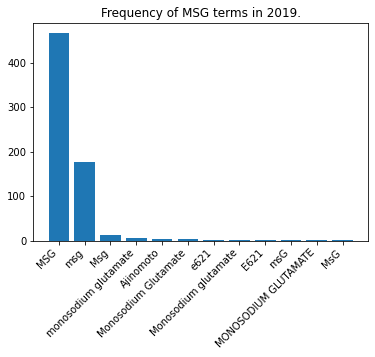

In [22]:
name_freq = data_2019['match'].value_counts()
name_freq
plt.bar(name_freq.index,name_freq)
plt.xticks(rotation=45, ha="right")
plt.title('Frequency of MSG terms in 2019.')

Inspecting the most frequent authors:

In [23]:
name_freq = data_2019['author'].value_counts()
name_freq

dopnyc              13
Kibology            11
shazeaa              9
PurpleWomat          7
mthmchris            7
                    ..
ohshitlastbite       1
herroitshayree       1
DoctorBre            1
ChickenNoodle519     1
OVBrewer             1
Name: author, Length: 481, dtype: int64

Inspecting the comment score distribution:

Text(0.5, 1.0, 'Histogram of scores of comments mentioning MSG in 2019.')

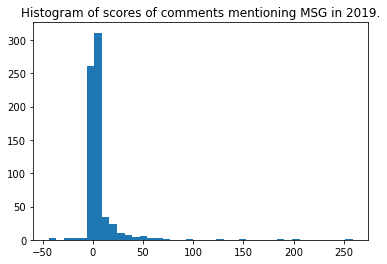

In [25]:
plt.hist(data_2019['score'],bins=40)
plt.title('Histogram of scores of comments mentioning MSG in 2019.')

Inspecting the subreddit frequencies:

Text(0.5, 1.0, 'Frequency of comments mentioning MSG per subreddits in 2019.')

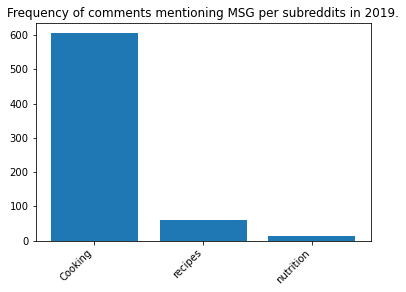

In [27]:
subreddit_freq = data_2019['subreddit'].value_counts()
subreddit_freq
plt.bar(subreddit_freq.index,subreddit_freq)
plt.xticks(rotation=45, ha="right")
plt.title('Frequency of comments mentioning MSG per subreddits in 2019.')

Inspecting the frequency per month and day:

Text(0.5, 1.0, 'Frequency of comments mentioning MSG per month in 2019.')

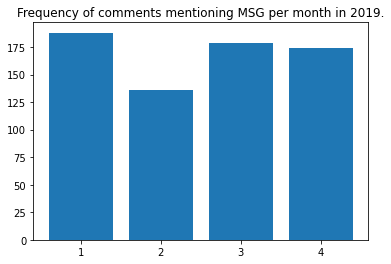

In [16]:
month_freq = data_2019['month'].value_counts()
month_freq
plt.bar(month_freq.index,month_freq)
plt.xticks(month_freq.index)
plt.title('Frequency of comments mentioning MSG per month in 2019.')

Text(0.5, 1.0, 'Frequency of comments mentioning MSG per day in the first month of 2019.')

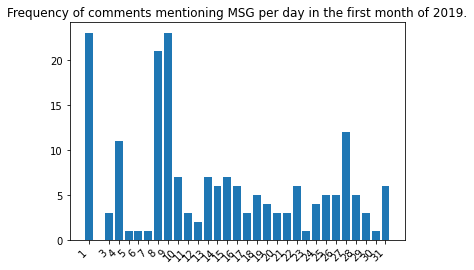

In [17]:
data_2019_1 = data_2019[data_2019['month'] == 1]
day_freq = pd.to_datetime(data_2019_1['time']).dt.day.value_counts()
day_freq
plt.bar(day_freq.index,day_freq)
plt.xticks(day_freq.index)
plt.xticks(rotation=45, ha="right")
plt.title('Frequency of comments mentioning MSG per day in the first month of 2019.')

# Aggregating data for authors

In [34]:
data_2008['former'] = True
data_2008['recent'] = False
data_2019['former'] = False
data_2019['recent'] = True
data_combined = pd.concat([data_2008,data_2019]).reset_index(drop=True)

In [35]:
authors_grouped = data_combined.groupby('author')

In [36]:
authors = pd.DataFrame(authors_grouped['body'].agg(lambda col: '\n\n ____NEXT COMMENT____ \n'.join(col)))
authors = pd.concat([authors,authors_grouped.agg(nr_comments=('body','count'),total_score=('score','sum'),
                 former=('former','any'),recent=('recent','any'))],axis=1)
authors['nr_rcooking'] = 0
authors['nr_rrecipes'] = 0
authors['nr_rnutrition'] = 0
for i in range(max(authors_grouped.size())):
    for user,sub in authors_grouped['subreddit'].nth(i).to_dict().items():
        authors["nr_r"+sub.lower()][user]+=1
authors.reset_index(inplace=True)

<ipython-input-36-0a0662217b56>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  authors["nr_r"+sub.lower()][user]+=1


In [37]:
authors

,author,body,nr_comments,total_score,former,recent,nr_rcooking,nr_rrecipes,nr_rnutrition
0,1954StarDust,I was reading that the amount to add is critic...,1,5,False,True,1,0,0
1,1n1billionAZNsay,According to [this website](http://www.hilary....,2,12,True,False,2,0,0
2,1point618,"OK, a few of my favorites:\n\nWhisky-carmelize...",1,6,True,False,1,0,0
3,25John,"Nutrition is prone to mass hysteria, at least ...",2,152,False,True,2,0,0
4,2Cuil4School,"Well, in all fairness, I don't think that McDs...",2,10,True,False,2,0,0
...,...,...,...,...,...,...,...,...,...
955,zf_laflare,MSG!!!!! Add it in the water Or Fish sauce.,1,4,False,True,1,0,0
956,zhiface,I have the same problems!\n\nExcept I am a fem...,1,3,True,False,0,0,1
957,ziplocket,"""(For those who think MSG is Umami, read on, y...",1,6,True,False,1,0,0
958,zombie_989,Can't really think of anything I'd turn down.....,1,1,False,True,1,0,0


In [38]:
authors[authors[['former','recent']].all(axis=1)]

,author,body,nr_comments,total_score,former,recent,nr_rcooking,nr_rrecipes,nr_rnutrition
138,GrumpySteen,MSG and sugar. Chick-Fil-A has quite a bit of...,7,52,True,True,2,5,0
286,Riddul,"I've kept MSG on my table (or I would, if I ha...",3,8,True,True,3,0,0
390,ameoba,MSG\n\n ____NEXT COMMENT____ \nI worked in a C...,6,64,True,True,6,0,0
469,chromiselda,I tried a quick google search in hope that I'd...,2,6,True,True,2,0,0
524,eastshores,Your post inspired me to go to my asian market...,2,97,True,True,2,0,0
637,jmalbo35,There's no proof of it happening to literally ...,2,2,True,True,0,2,0
724,mrhoopers,"See, I don't go for worcestershire because it ...",5,8,True,True,5,0,0


**Observation:** Seven authors appear in both periods.

# Preparing annotation files

In [39]:
annotation_data = authors.sample(frac=1,random_state=2020)
annotation_data['stance'] = ''

In [40]:
annotation_data

,author,body,nr_comments,total_score,former,recent,nr_rcooking,nr_rrecipes,nr_rnutrition,stance
76,CogitoNM,High levels of phytic acid in soy reduce assim...,1,-1,True,False,1,0,0,
539,eutamias21,"Ah, the ol' stand by! I just checked and we've...",1,2,False,True,1,0,0,
84,DaGreatness,When I gotta impress someone with my cooking. ...,1,7,False,True,1,0,0,
322,Sunshine_of_your_Lov,find different ways to bring umami. Dried fish...,1,2,False,True,1,0,0,
478,cookerlv,"MSG should be more commonplace, it has absolut...",1,10,False,True,1,0,0,
...,...,...,...,...,...,...,...,...,...,...
707,metaphorm,"gonna sound like sacrilege, but you might want...",1,3,True,False,1,0,0,
630,jdw1066,"""Ajinomoto"" (MSG). My grandma is Japanese-Amer...",1,1,False,True,1,0,0,
323,SuperStealthOTL,Almost every Caesar salad I’ve eaten in Canada...,1,1,False,True,1,0,0,
392,andkeener,"Ive never used sazon before, is there MSG in i...",2,2,True,False,2,0,0,


Creating annotation file

In [ ]:
annotation_data.to_csv('full_data.csv')
annotation_data[['body','stance']].to_csv('annotation_file.csv')